In [120]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import random

img = Image.open('Lenna.png')
gray = img.convert("L")
gray = np.array(gray)

In [130]:

class Center(object):
    def __init__(self,x,y,g = 0):
        self.update(x,y,g)
        self.pixels = []
    
    def update(self,x,y,g):
        self.x = x
        self.y = y
        self.g = g
    
    def __str__(self):
        return "{},{}:{}".format(self.x, self.y, self.g)
 
    def __repr__(self):
        return self.__str__()
    

class kmeans_gray(object):
    def show_center(self,x,y):
        return Center(x,y,self.data[x,y])
        
    def __init__(self,K,gray):
        self.K = K
        self.data = gray
        self.img_x = self.data.shape[0]
        self.img_y = self.data.shape[1]
        self.dis = np.full((self.img_x, self.img_y), np.inf)
        
        self.label = np.full((self.img_x, self.img_y),0,int)
        self.centers = []
        
    def init_centers(self):
        for i in range(self.K):
            self.centers.append(self.show_center(random.randint(0,self.img_x - 1),random.randint(0,self.img_y - 1)))
    
    def assigment(self):
        label = 0
        for center in self.centers:
            for i in range(self.img_x):
                for j in range(self.img_y):
                    gray = self.data[i,j]
                    D = abs(int(gray) - int(center.g))
                    if D < self.dis[i,j]:                            
                        self.dis[i,j] = D
                        self.label[i,j] = label
            label += 1

In [134]:
testclass = kmeans_gray(3,gray)
testclass.init_centers()
testclass.centers

[318,151:53, 218,191:52, 351,76:86]

In [135]:
testclass.assigment()
testclass.dis

array([[76., 76., 76., ..., 84., 69., 42.],
       [76., 76., 76., ..., 84., 69., 42.],
       [76., 76., 76., ..., 84., 69., 42.],
       ...,
       [ 9.,  9.,  2., ..., 18., 14., 12.],
       [ 8.,  8.,  2., ..., 18., 19., 22.],
       [ 8.,  8.,  2., ..., 18., 19., 22.]])

In [136]:
testclass.label

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 0, ..., 2, 2, 2],
       [1, 1, 0, ..., 2, 2, 2]])

In [96]:
for i in range(len(testclass.centers[0].pixels)):
    gray[testclass.centers[0].pixels[i]] = 0
for i in range(len(testclass.centers[1].pixels)):
    gray[testclass.centers[1].pixels[i]] = 125
for i in range(len(testclass.centers[2].pixels)):
    gray[testclass.centers[2].pixels[i]] = 255

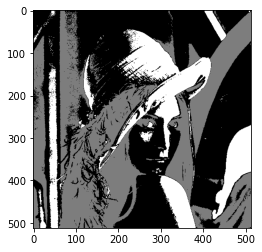

In [97]:
plt.imshow(gray,'gray')

In [101]:
np.full((512,512), 0,int)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])